In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


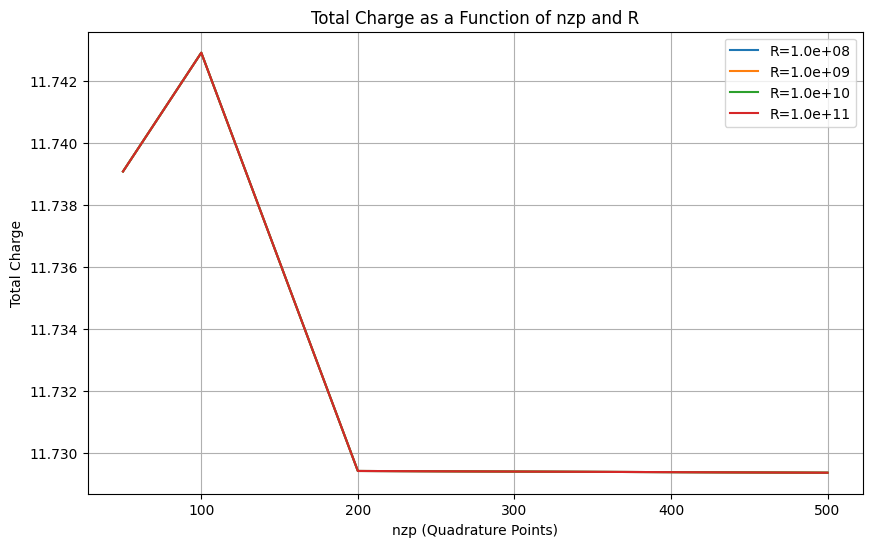

In [9]:
# Set input and output folder paths
output_folder = "output/toy_model2/charge_convergence"
result_files = [f for f in os.listdir(output_folder) if f.endswith(".npy")]

# Dictionary to store total charge for each (nzp, R) combination
charge_sums = {}

# Extract and compute total charge
for file in result_files:
    # Parse nzp and R from the filename
    parts = file.split("_")
    nzp = int(parts[4])
    R = int(parts[6].split(".")[0])  # Extract R and convert to integer

    # Load the charge data and compute the sum
    charge_data = np.load(os.path.join(output_folder, file))
    total_charge = np.sum(charge_data)

    # Store the total charge
    charge_sums[(nzp, R)] = total_charge

# Prepare data for histogram
nzp_values = sorted(set(k[0] for k in charge_sums.keys()))
R_values = sorted(set(k[1] for k in charge_sums.keys()))

# Create the histogram
plt.figure(figsize=(10, 6))
for R in R_values:
    charges_for_R = [charge_sums[(nzp, R)] for nzp in nzp_values]
    plt.plot(nzp_values, charges_for_R, label=f"R={R:.1e}")

# Add labels and legend
plt.xlabel("nzp (Quadrature Points)")
plt.ylabel("Total Charge")
plt.title("Total Charge as a Function of nzp and R")
plt.legend()
plt.grid(True)

plt.show()


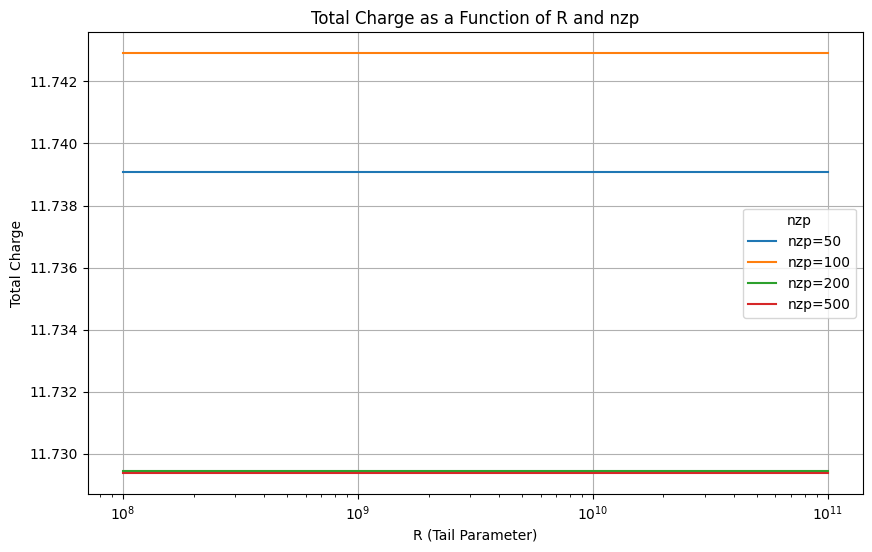

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set input and output folder paths
output_folder = "output/toy_model2/charge_convergence"
result_files = [f for f in os.listdir(output_folder) if f.endswith(".npy")]

# Dictionary to store total charge for each (nzp, R) combination
charge_sums = {}

# Extract and compute total charge
for file in result_files:
    # Parse nzp and R from the filename
    parts = file.split("_")
    nzp = int(parts[4])
    R = int(parts[6].split(".")[0])  # Extract R and convert to integer

    # Load the charge data and compute the sum
    charge_data = np.load(os.path.join(output_folder, file))
    total_charge = np.sum(charge_data)

    # Store the total charge
    charge_sums[(nzp, R)] = total_charge

# Prepare data for plotting
nzp_values = sorted(set(k[0] for k in charge_sums.keys()))
R_values = sorted(set(k[1] for k in charge_sums.keys()))

# Create the plot with R on the x-axis
plt.figure(figsize=(10, 6))
for nzp in nzp_values:
    charges_for_nzp = [charge_sums[(nzp, R)] for R in R_values]
    plt.plot(R_values, charges_for_nzp, label=f"nzp={nzp}")

# Add labels and legend
plt.xlabel("R (Tail Parameter)")
plt.ylabel("Total Charge")
plt.title("Total Charge as a Function of R and nzp")
plt.legend(title="nzp")
plt.xscale("log")  # Set x-axis to logarithmic scale for R
plt.grid(True)

plt.show()
